Target Project: SimpleHTR (https://github.com/githubharald/SimpleHTR) <br>
Target Library: Tensorflow

### 1. Method Invocation

In [1]:
import utils.utils as utils
import data.SimpleHTRMaster as data

import libcst as cst
source_tree = cst.parse_module(data.file_string) #using libcst to parse module

saved = []
invocations = []

class getMethodInvocation(cst.CSTVisitor):
    def visit_Attribute(self, node: cst.Attribute) -> None:
        # print("---------------------")
        # print(node.children)

        try:
            if(node.value.value.value.value == "tf"):
                saved.append(node.value.value.value.value + "." + node.value.value.attr.value + "." + node.value.attr.value)
                string = node.value.value.value.value + "." + node.value.value.attr.value + "." + node.value.attr.value + "." + node.attr.value
                invocations.append(string)
                return
        except:
            pass

        try:
            if(node.value.value.value.value == "tf"):
                saved.append(node.value.value.value.value + "." + node.value.value.attr.value + "." + node.value.attr.value)
                string = node.value.value.value.value + "." + node.value.value.attr.value + "." + node.value.attr.value + "." + node.attr.value
                invocations.append(string)
                return
        except:
            pass

        try:
            if(node.value.value.value == "tf"):
                saved.append(node.value.value.value + "." + node.value.attr.value)
                string = node.value.value.value + "." + node.value.attr.value + "." + node.attr.value
                if(string not in saved ):
                    invocations.append(string)
                return
        except:
            pass

        try:
            if(node.value.value == "tf"):
                string = node.value.value + "." +node.attr.value
                if(string not in saved ):
                    invocations.append(string)
        except:
            pass 

source_tree.visit(getMethodInvocation()) #traverse
print(invocations)

['tf.compat.v1.disable_eager_execution', 'tf.compat.v1.placeholder', 'tf.bool', 'tf.compat.v1.placeholder', 'tf.float32', 'tf.compat.v1.get_collection', 'tf.compat.v1.GraphKeys', 'tf.control_dependencies', 'tf.compat.v1.train', 'tf.expand_dims', 'tf.Variable', 'tf.random.truncated_normal', 'tf.nn.conv2d', 'tf.compat.v1.layers', 'tf.nn.relu', 'tf.nn.max_pool2d', 'tf.squeeze', 'tf.compat.v1.nn', 'tf.compat.v1.nn', 'tf.compat.v1.nn', 'tf.expand_dims', 'tf.concat', 'tf.Variable', 'tf.random.truncated_normal', 'tf.squeeze', 'tf.nn.atrous_conv2d', 'tf.transpose', 'tf.SparseTensor', 'tf.compat.v1.placeholder', 'tf.int64', 'tf.compat.v1.placeholder', 'tf.int32', 'tf.compat.v1.placeholder', 'tf.int64', 'tf.compat.v1.placeholder', 'tf.int32', 'tf.reduce_mean', 'tf.compat.v1.nn', 'tf.compat.v1.placeholder', 'tf.float32', 'tf.compat.v1.nn', 'tf.nn.ctc_greedy_decoder', 'tf.nn.ctc_beam_search_decoder', 'tf.nn.softmax', 'tf.compat.v1.Session', 'tf.compat.v1.train', 'tf.__version__', 'tf.compat.v1.Ses

### 2. Call Sequences

In [2]:
statements = source_tree.children
simple_statement_lines = [] #list containing nodes of type SimpleStatementLines
function_def_lines = [] #list containing nodes of type FunctionDef

results = utils.sort_statements(statements)
simple_statement_lines = results[0]
function_def_lines = results[1]
class_def_lines = results[2]

calls = []
calls_pIndex = []

def call_search_SSL(parent, index):
    if(isinstance(parent, cst.Call)):
        try:
            if(parent.func.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
            if(parent.func.value.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
            if(parent.func.value.value.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
        except:
            pass
    if(len(parent.children) == 0):
        return
    else:
        for child in parent.children:
            call_search_SSL(child, index)

for i in range(len(simple_statement_lines)):
    if(isinstance(simple_statement_lines[i], cst.SimpleStatementLine)):
        call_search_SSL(simple_statement_lines[i], i)


In [3]:
calls = []
calls_pIndex = []

def call_search_SSL(parent, index):
    if(isinstance(parent, cst.Call)):
        try:
            if(parent.func.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
            if(parent.func.value.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
            if(parent.func.value.value.value.value == 'tf'):
                calls.append(parent)
                calls_pIndex.append(index)
        except:
            pass
    if(len(parent.children) == 0):
        return
    else:
        for child in parent.children:
            call_search_SSL(child, index)

for i in range(len(simple_statement_lines)):
    if(isinstance(simple_statement_lines[i], cst.SimpleStatementLine)):
        call_search_SSL(simple_statement_lines[i], i)

simpleStatementLine_calls = []

for i in range(len(calls)):
    simpleStatementLine_calls.append([calls_pIndex[i], calls[i]])

groupings = utils.cluster(calls_pIndex, maxgap=1)

#only 1 function call for tensorflow library in main source tree
#no other function definition in main source tree
#hence check for other class definition trees 

#Call Sequences

call_sequences = []

for group in groupings:
    temp_call_sequence = []
    for called in simpleStatementLine_calls:
        if(called[0] in group):
            #print(called[1])
            temp_call_sequence.append(called[1])
    call_sequences.append(temp_call_sequence)

In [4]:
#only 2nd class definition tree contain tensorflow library API calls
#hence only work on 2nd class definition tree 'class_def_lines[1]'
#this tree does not contain any simplestatementlines that contains tensorflow library API calls
#hence only work on function definitions

results2 = utils.sort_statements(class_def_lines[1].body.body)
results2[1]

groups = []

def call_search_FD(parent):
    if(isinstance(parent, cst.Call)):
        try:
            if(parent.func.value.value == 'tf'):
                group.append(parent)
            if(parent.func.value.value.value == 'tf'):
                group.append(parent)
            if(parent.func.value.value.value.value == 'tf'):
                group.append(parent)
            if(parent.func.value.value.value.value.value == 'tf'):
                group.append(parent)
        except:
            pass
    if(len(parent.children) == 0):
        return
    else:
        for child in parent.children:
            call_search_FD(child)

for function_def in results2[1]:
    if(isinstance(function_def, cst.FunctionDef)):
        group = []
        call_search_FD(function_def)
        groups.append(group)

for group in groups:
    if(len(group) >= 1):
        call_sequences.append(group)

call_sequences

[[Call(
      func=Attribute(
          value=Attribute(
              value=Attribute(
                  value=Name(
                      value='tf',
                      lpar=[],
                      rpar=[],
                  ),
                  attr=Name(
                      value='compat',
                      lpar=[],
                      rpar=[],
                  ),
                  dot=Dot(
                      whitespace_before=SimpleWhitespace(
                          value='',
                      ),
                      whitespace_after=SimpleWhitespace(
                          value='',
                      ),
                  ),
                  lpar=[],
                  rpar=[],
              ),
              attr=Name(
                  value='v1',
                  lpar=[],
                  rpar=[],
              ),
              dot=Dot(
                  whitespace_before=SimpleWhitespace(
                      value='',
                  ),
   

### 3. Usage Patterns

In [5]:
method_invocations = []

#get list of all method invocations
for call_sequence in call_sequences:
    for method in call_sequence:
        if(method not in method_invocations):
            method_invocations.append(method)

#save method invocationss as defined MethodCall class into new list
method_invocations_processed = []
for method in method_invocations:
    x = ""
    try:
        x = (method.func.value.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value + "." + method.func.value.attr.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    try:
        x = (method.func.value.value.value.value.value + "." + method.func.value.value.value.attr.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    method_invocations_processed.append(utils.MethodCall(x, method))

#save method in call seqeunces as defined MethodCall class into new list
call_sequences_processed = []
for call_sequence in call_sequences:
    temp_call_sequence = []
    for call in call_sequence:
        x = ""
        try:
            x = (call.func.value.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value + "." + call.func.value.attr.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        try:
            x = (call.func.value.value.value.value.value + "." + call.func.value.value.value.attr.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        temp_call_sequence.append(utils.MethodCall(x, call))
    call_sequences_processed.append(temp_call_sequence) 

In [6]:
target_method_done = []

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        print("~ " + target_method.name)
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            utils.generate_usage_pattern(target_method, valid_call_sequence).print()
        target_method_done.append(target_method.name)
        print()
        print()

~ tf.compat.v1.disable_eager_execution
========== Usage Pattern ==========
Target Method: tf.compat.v1.disable_eager_execution
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}


~ tf.compat.v1.placeholder
========== Usage Pattern ==========
Target Method: tf.compat.v1.placeholder
Pre-Set: {}
Post-Set: {tf.compat.v1.get_collection, tf.control_dependencies, tf.compat.v1.train.AdamOptimizer}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: tf.compat.v1.placeholder
Pre-Set: {tf.transpose, tf.SparseTensor, tf.reduce_mean, tf.compat.v1.nn.ctc_loss}
Post-Set: {tf.reduce_mean, tf.compat.v1.nn.ctc_loss, tf.nn.ctc_greedy_decoder, tf.nn.ctc_beam_search_decoder, tf.nn.softmax}
Accompany-Set: {tf.compat.v1.nn.ctc_loss}


~ tf.compat.v1.get_collection
========== Usage Pattern ==========
Target Method: tf.compat.v1.get_collection
Pre-Set: {tf.compat.v1.placeholder}
Post-Set: {tf.control_dependencies, tf.compat.v1.train.AdamOptimizer}
Accompany-Set: {}


~ tf.control_dependencies
=======

In [7]:
target_method_done = []
usage_pattern_dict = {}

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        usage_pattern_dict[target_method.name] = []
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            temp_usage_pattern = utils.generate_usage_pattern(target_method, valid_call_sequence)
            usage_pattern_dict[target_method.name].append(temp_usage_pattern)
        target_method_done.append(target_method.name)

### Sequence Clusters

Method Invocation: tf.compat.v1.disable_eager_execution

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.placeholder

Similarity Matrix: 
     0    1
0  1.0  0.0
1  0.0  1.0



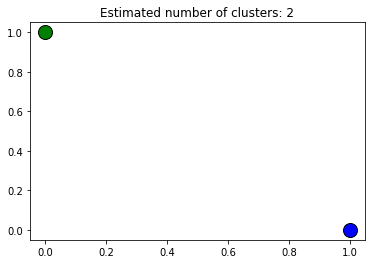

Labels:
[0 1]
Method Invocation: tf.compat.v1.get_collection

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.control_dependencies

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.train.AdamOptimizer

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.expand_dims

Similarity Matrix: 
          0         1
0  1.000000  0.407407
1  0.407407  1.000000



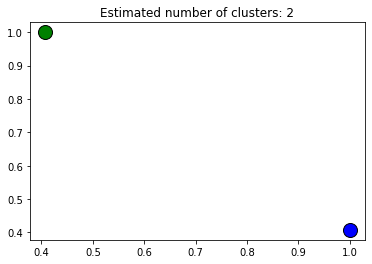

Labels:
[0 1]
Method Invocation: tf.Variable

Similarity Matrix: 
          0         1
0  1.000000  0.464286
1  0.464286  1.000000



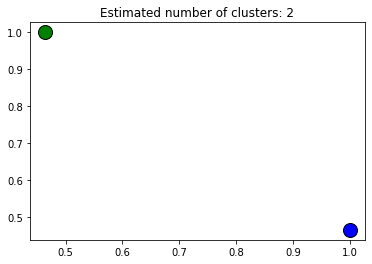

Labels:
[0 1]
Method Invocation: tf.random.truncated_normal

Similarity Matrix: 
          0         1
0  1.000000  0.466667
1  0.466667  1.000000



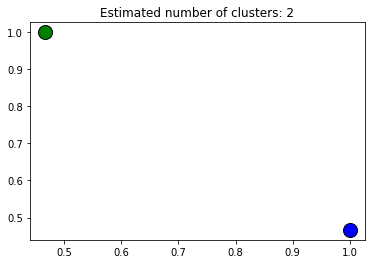

Labels:
[0 1]
Method Invocation: tf.nn.conv2d

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.layers.batch_normalization

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.relu

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.max_pool2d

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.squeeze

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.nn.bidirectional_dynamic_rnn

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.concat

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.atrous_conv2d

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.transpose

Method Invoca

In [9]:
from pandas import *
for key in usage_pattern_dict:
    print("=================================================")
    print("Method Invocation: " + key)
    print()

    target_usage_pattern_list = usage_pattern_dict[key]

    if len(target_usage_pattern_list) == 1:
        print("Method Invocation contains only 1 usage pattern.")
        print("No clusters are generated. ")
    else:
        similarity_matrix = utils.generate_similarity_matrix(target_usage_pattern_list)
        print("Similarity Matrix: ")
        print(DataFrame(similarity_matrix))
        print()
        utils.generate_clusters(similarity_matrix, True)